# Internship

# Task-1_Thesparkfoundation_K_means_clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("C:\Data science\Machine learning with phyton\Thesparkfoundataion\Datasets\Iris.csv")

In [3]:
df.shape

(150, 6)

In [13]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df=df.drop_duplicates()

In [16]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

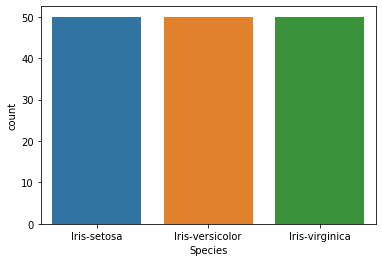

In [18]:
sns.countplot(x="Species",data=df)
plt.show()

In [19]:
con=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

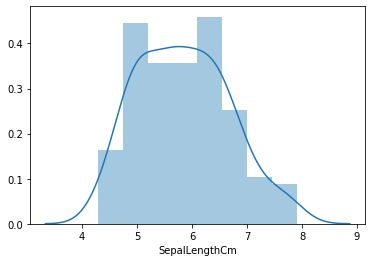

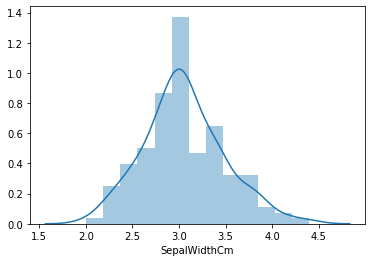

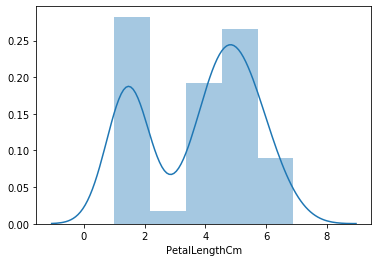

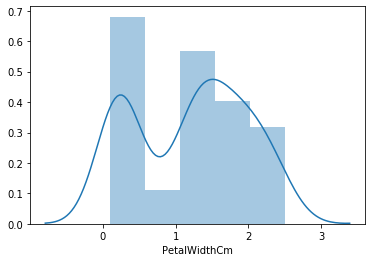

In [20]:
for i in con: 
    sns.distplot(df[i])
    plt.show() 

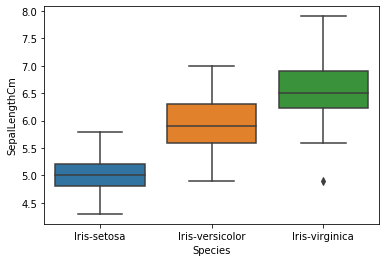

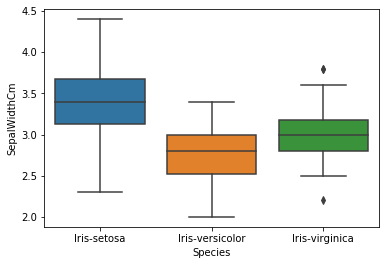

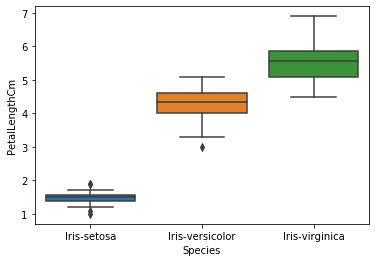

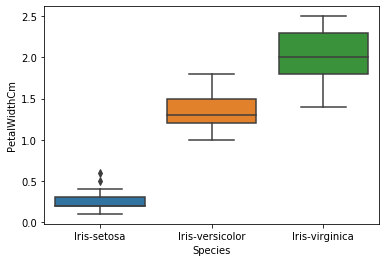

In [22]:
for i in con:
    sns.boxplot(y=i,x="Species",data=df)
    plt.show()

In [24]:
df["SepalLengthCm"].quantile(0.25)

5.1

In [25]:
df["SepalWidthCm"].quantile(0.50)

3.0

In [26]:
df["PetalLengthCm"].quantile(0.75)

5.1

In [27]:
x=df[['SepalLengthCm','SepalWidthCm']]

In [28]:
from sklearn.cluster import KMeans

In [29]:
model=KMeans(n_clusters=6)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
x["cluster"]=model.predict(x)

C:\Users\Anuja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
x

,SepalLengthCm,SepalWidthCm,cluster
0,5.1,3.5,0
1,4.9,3.0,4
2,4.7,3.2,4
3,4.6,3.1,4
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,3
146,6.3,2.5,2
147,6.5,3.0,3
148,6.2,3.4,3


In [32]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(x)
    sum_distance.append(km.inertia_)

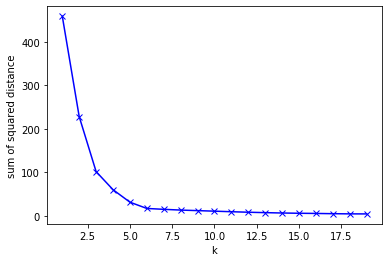

In [33]:
plt.plot(k,sum_distance,'bx-')
plt.xlabel("k")
plt.ylabel("sum of squared distance")
plt.show()

In [34]:
model.cluster_centers_
cen=model.cluster_centers_
cen

array([[5.28333333, 3.70833333],
       [7.43846154, 3.13076923],
       [5.9025    , 2.7475    ],
       [6.55      , 3.05555556],
       [4.76      , 3.184     ],
       [5.175     , 2.40833333]])

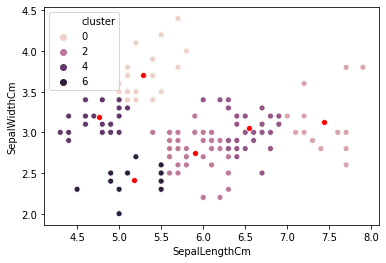

In [35]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",hue="cluster",data=x)
sns.scatterplot(cen[:,0],cen[:,1],color='red')
plt.show()

In [37]:
df2=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [38]:
sum_distance=[]
k=range(1,20)
for i in k:
    km=KMeans(n_clusters=i)
    km=km.fit(df2)
    sum_distance.append(km.inertia_)

In [39]:
sum_distance

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.930963049671746,
 34.420232439782446,
 30.374975441225445,
 27.7681893939394,
 25.909045084301667,
 24.585353438228438,
 23.30066738653504,
 21.494786435786438,
 20.628500000000003,
 19.331261904761906,
 17.442734126984128,
 16.85161904761905,
 16.31049963924964,
 15.236954517704518]

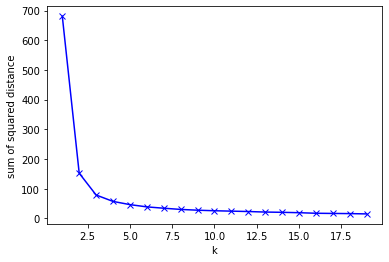

In [40]:
plt.plot(k,sum_distance,'bx-')
plt.xlabel("k")
plt.ylabel("sum of squared distance")
plt.show()

In [41]:
algo=KMeans(n_clusters=4)
algo.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
df2["cluster"]=algo.predict(df2)

C:\Users\Anuja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,2
